In [3]:
from time import process_time
from scipy.stats import sem
from scipy.spatial import KDTree
from skimage.measure import marching_cubes

import gc, os

import numpy as np
import os
from pyvista import Cylinder

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator


import pandas as pd
import pyvista as pv
import pydicom
from matplotlib import pyplot as pltLa
import os
import pandas as pd
import numpy as np
import sympy as sym
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

import numpy as np
import os
from pyvista import Cylinder

import pandas as pd
import pyvista as pv
import pydicom, rtdsm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator


import pylab 
from numpy import array
from numpy import reshape
import seaborn as sns
import csv
import pandas as pd
import seaborn as sn
import numpy as np
from datetime import datetime
import scipy.stats  as stats
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib.patches import Rectangle
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, chi2
from scipy import stats
import plotly.graph_objects as go
from matplotlib import pyplot
from numpy import reshape
from statsmodels.stats.power import TTestIndPower
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import os 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
import imblearn
from imblearn import  over_sampling

from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import median
from numpy import std
from scipy.stats import skew
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn import  over_sampling
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

from scipy.stats import sem
from numpy.random import randn
from math import sqrt
from numpy import mean
from scipy.stats import t
from scipy import stats

import statsmodels.api as sm 
import pylab as py 
import mpl_toolkits.axisartist as axisartist
from scipy.stats import ranksums
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.utils import resample

import matplotlib.pyplot as plt #importamos los paquetes.
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
def test_umw(df_R,df_NR,set1,param,param2):
    f_xs = ['0','5','10','15','20','25']
    test = []
    values_NR = []
    values_R = []
    fxs = []
    values_NR2 = []
    values_R2 = []
    

    for head in set1[0:]:
        if '_' in param2:  
            param3 = param2.split('_')
        else:
            param3=[param2]        
            
        if head.split('_')[1:]==param3:
            fx = head.split('-')[-1].split('_')[0]
        
            if fx=='BODY':
                fxs.append(int(0))
                values_1 = list(df_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
                values = [[i,0,'R'] for i in cleanedList_1]
                values8 = [[i,int(0),'R'] for i in cleanedList_1]
                values_R.append(values)
                    
                values_2 = list(df_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']   
                values2 = [[i,0,'NR'] for i in cleanedList_2]
                values9 = [[i,int(0),'NR'] for i in cleanedList_2]
                values_NR.append(values2)
            else: 
                
                fxs.append(int(fx)) 
                values_1 = list(df_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
                
                values = [[i,fx,'R'] for i in cleanedList_1]
                values8 = [[i,int(fx),'R'] for i in cleanedList_1]
                values_R.append(values)
                
                values_2 = list(df_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']
                
                values2 = [[i,fx,'NR'] for i in cleanedList_2]
                values9 = [[i,int(fx),'NR'] for i in cleanedList_2]
                values_NR.append(values2)
            if fx=='BODY':
                fx='0'
            else:
                fx=fx
            if fx in f_xs:
                values_NR2.append(values9)
                values_R2.append(values8)

            
            U,p = mannwhitneyu(values_1,values_2,method='auto',nan_policy='omit') #Se aplica el test 
            n0 = len(cleanedList_1)
            n1 = len(cleanedList_2)
            test.append(p)

    return fxs,test


In [10]:
def get_graphs_delta(directory,data_file,patients_R,patients_NR,raplnned_fx):
    direct = directory+'/'+data_file+'/'
    files = [direct+file for file in os.listdir(directory+'/'+data_file+'/')]
    
    file_1 = pd.read_csv(files[0])
    label = (file_1.columns)[0]
    patients = []
    fxs = []

    for file in files:
        patient = file.split('_')[-1].split('.')[0]
        patients.append(int(patient))
        df = pd.read_csv(file) 
        header_0 = list(df.columns.values)
        for j in header_0[2:]: 
            fxs.append(int(j.split('-')[1]))
    
    bodies_set = ['Body-'+str(i) for i in range(1,max(fxs))]
    bodies_set.insert(0,'BODY')
   
    params = list(file_1[label])
    patients_sorted = sorted(patients)
    
    data_R = get_values_R(params,patients_R,bodies_set,direct,files)
   
    data_NR,header = get_values_NR(params,patients_NR,bodies_set,direct,files)
    
    d_NR = pd.DataFrame(data=data_NR)
    d_NR = d_NR.T
    d_NR.columns =header
    d_R = pd.DataFrame(data=data_R)
    d_R = d_R.T
    d_R.columns =header
    
    frames = [d_R, d_NR]
    result = pd.concat(frames)
    
    rR = len(patients_R)
    rNR = len(patients_NR)
    
    rang = len(header)/(int(max(fxs))+1)
    #print(max(fxs))
    fxss1 = list(set(fxs))
    fxss1.insert(0,0)
    fxss = fxss1[0:-1]
    for j in range(0,len(params)):
        set1 = header[(j)*(max(fxs)):(max(fxs))*(j+1)]
        result0 = result.copy()[set1]
        parameter = params[j]
        get_delta_replanned(patients_R,result0,set1,replanned_fx,rR,parameter)

In [33]:
def violin_all_2(df_vys_R,df_vys_NR,set1,param,param2,fxs1,title):
    colorr = {"replanned": "red", "non-replanned": "dodgerblue"}
    color2 = 'tab:skyblue'
    color3 = 'tab:pink'
    
    f_xs = [str(i) for i in range(0,max(fxs1)+1,5)]
    f_x2 = [int(i) for i in range(0,max(fxs1)+1,5)]
    test = []
    values_NR = []
    values_R = []
  
    fxs = []
    values_NR2 = []
    values_R2 = []
  
    for head in set1[:]:
        if '_' in param2:  
            param3=param2.split('_')
        else:
            param3=[param2]
        if head.split('_')[1:]==param3:
            fx = head.split('-')[-1].split('_')[0]
            
            if fx=='BODY':
                fxs.append(int(0))
                values_1 = list(df_vys_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
            
                values = [['Replanned',0,i] for i in cleanedList_1]
                values_R.append(values)
                    
                values_2 = list(df_vys_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']
                 
                values2 = [['Non-replanned',0,i] for i in cleanedList_2]
                values_NR.append(values2)
                #values2 = [['NR',fx,0] for i in cleanedList_2]
                values9 = [['Non-replanned',0,i] for i in cleanedList_2]
                values8 = [['Replanned',0,i] for i in cleanedList_1]
                values_NR2.append(values9)
                values_R2.append(values8)
            else: 
                
                fxs.append(int(fx)) 
                values_1 = list(df_vys_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
                 
                values = [['replanned',int(fx),i] for i in cleanedList_1]
                values8 = [['replanned',int(fx),i] for i in cleanedList_1]
                values_R.append(values)
                
                values_2 = list(df_vys_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']
 
                values2 = [['non-replanned',int(fx),i] for i in cleanedList_2]
                values9 = [['non-replanned',int(fx),i] for i in cleanedList_2]
                values_NR.append(values2)
                if fx in f_xs:
                    values_NR2.append(values9)
                    values_R2.append(values8)

    data = []
    for i in values_NR:
        for j in i:
            data.append(j)
            
    for i in values_R:
        for j in i:
            data.append(j)
        
    data3 = []
    #print(values_NR2)
    for i in values_NR2:
        for j in i:
            data3.append(j)
    
    for i in values_R2:
        for j in i:
            data3.append(j)
            
    #data2 = pd.DataFrame(data,columns=[param,'fx','class'])/values_R2
    #data4 = pd.DataFrame(data3,columns=[param,'fx','class'])/values_R2[0]
    #datoss = pd.DataFrame(datos,columns=['ID','RvsNR','fx','slope'])
    data4 = pd.DataFrame(data3,columns=['class','fx',param])
    
    
    fig, ax = plt.subplots(1,1,figsize=(5,3))
    sns.boxplot(data=data4, x="fx", y=param, hue='class',palette={"replanned": "crimson", "non-replanned": "skyblue"},ax=ax)
    #sns.boxplot(data=data4,  x='fx', y=param, hue='class',ax=ax[0],scale_hue=True,palette=colorr,split=True, inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    ax.plot([],[],',',label=r'slope: 67.3/fx',markersize=0)
    ax.plot([],[],',',label=r'slope: 45.4/fx',markersize=0)
    ax.set_ylabel(r'Normalized values',fontsize=12)
    ax.legend(ncols=2,columnspacing=-2)
    ax.set_xlabel('Fraction number',fontsize=12)
    #ax.set_yscale('symlog',linthresh=1e)
    
    ax.tick_params(axis='x',direction='in')
    ax.tick_params(axis='y',direction='in')
    #ax.set_yticks([1e2,1e3,3e3,5e3,1e4])
    ax.set_title(title+' over fractions',fontsize=13)
    ax.set_ylim(1e-5,1e6)

    
    if '/' in param:
        para9 = param.split('/')
        param = para9[0]+'_'+para9[1]
        
        plt.savefig('PARAMS_120/'+param+'.pdf',dpi=500,bbox_inches='tight')
        plt.show()
    else:
        param = param
        #plt.show()
        plt.savefig('PARAMS_120/'+param+'.pdf',dpi=500,bbox_inches='tight')
        plt.show()
        
def get_data(directory,data_file,patients_R,patients_NR):
    direct = directory+'/'+data_file+'/'
    files = [direct+file for file in os.listdir(directory+'/'+data_file+'/')]
    
    file_1 = pd.read_csv(files[0])
    label = (file_1.columns)[0]
    patients = []
    fxs = []

    for file in files:
        patient = file.split('_')[-1].split('.')[0]
        patients.append(int(patient))
        df = pd.read_csv(file) 
        header_0 = list(df.columns.values)
        for j in header_0[2:]: 
            fxs.append(int(j.split('-')[1]))
    
    bodies_set = ['Body-'+str(i) for i in range(1,max(fxs))]
    bodies_set.insert(0,'BODY')
   
    params = list(file_1[label])
    patients_sorted = sorted(patients)
    
    data_R = get_values_R(params,patients_R,bodies_set,direct,files)
   
    data_NR,header = get_values_NR(params,patients_NR,bodies_set,direct,files)
    
    d_NR = pd.DataFrame(data=data_NR)
    d_NR = d_NR.T
    d_NR.columns =header
    d_R = pd.DataFrame(data=data_R)
    d_R = d_R.T
    d_R.columns =header
    
    frames = [d_R, d_NR]
    result = pd.concat(frames)
    
    rR = len(patients_R)
    rNR = len(patients_NR)
    
    rang = len(header)/(int(max(fxs))+1)
    #print(max(fxs))
    fxss1 = list(set(fxs))
    fxss1.insert(0,0)
    fxss = fxss1[0:-1]
    data_final= []
    for j in range(0,len(params)):
        set1 = header[(j)*(max(fxs)):(max(fxs))*(j+1)]
        result0 = result.copy()[set1]
        parameter = params[j]
        data_final.append([parameter,set1,result0])
    return data_final 

def get_values_R(params,PATIENTS_R,bodies_set,direct,files):
    data_R = []
    for parameter in range(0,len(params)):
        for body in bodies_set:
            data = []
            for patient in PATIENTS_R:
                #print(patient)
                for file in files:
                    pat = int(file.split('_')[-1].split('.')[0])
                
                    if pat==int(patient):
                        #print(pat)
                        df2 = pd.read_csv(file) 
                       # print(df2)
                        header_0 = list(df2.columns.values)
                        if body in header_0:
                            data.append((df2[body][parameter]))
                        else:
                            data.append(np.nan)
    
            data_R.append(data)
    return data_R
    
def get_values_NR(params,PATIENTS_NR,bodies_set,direct,files):
    data_NR = []
    header = []
    for parameter in range(0,len(params)):
        for body in bodies_set:
            data = []
            for patient in PATIENTS_NR:
                #print(patient)
                for file in files:
                    pat = int(file.split('_')[-1].split('.')[0])
                    if pat==int(patient):
                        df2 = pd.read_csv(file) 
                        header_0 = list(df2.columns.values)
                        if body in header_0:
                            data.append((df2[body][parameter]))
                        else:
                            data.append(np.nan)
            header.append(body+'_'+params[parameter])
            data_NR.append(data)
    return data_NR,header

def ticks_figure(ax):
    ax.xaxis.set_tick_params(width=1,length=3)
    ax.yaxis.set_tick_params(width=1,length=3)
    ax.xaxis.set_tick_params(which='minor',width=1,length=3)
    ax.yaxis.set_tick_params(which='minor',width=1,length=3)
    ax.xaxis.set_tick_params(tickdir="in", left="True",labelleft="True",right=False)
    ax.yaxis.set_tick_params(tickdir="in", left="True",labelleft="True",right=False)
    ax.xaxis.set_tick_params(tickdir="in", left="True",which='minor',labelleft="True",right=False)
    ax.yaxis.set_tick_params(tickdir="in", left="True",which='minor',labelleft="True",right=False)
    ax.minorticks_off()
    return
    

In [34]:
file = 'IDS_News_Partial.csv'  #IDS OF THE PATIENTS INCLUDED IN THE STUDY (ALSO KNOWN AS MRN)
import csv
ids_news = []
NEWS_R = []
NEWS_NR = []
with open(file, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        ids_news.append(row[0])
        if row[1]=='0':
            NEWS_NR.append(row[0])
        else:
            NEWS_R.append(row[0])
        

### Toxicities Plot

In [64]:
data_weights = pd.read_csv('PEG_filled.csv')
data_R = data_weights[0:75]
types = []
for j in list(data_R.columns):
    values = list(set(list(data_R[j].values)))
    for l in values:
        types.append(l)
        
kps = sorted(list(set(types)))
#kps.append(2)
total = []
ffx = [0,5,10,15,20,25]
for j in list(data_R.columns):
    values = list(set(list(data_R[j].values)))
    countss = []
    for m in kps:
        countp =list(data_R[j].values).count(m)
        fx = int(j.split('-')[1].split('_')[0])
        if fx in ffx:
            countss.append([fx,m,int(countp)])
        
    total.append(countss)
        
total2 = []
for j in total:
    if len(j)!=0:
        total2.append(j)
        
valuess = []
for j in total2:
    valuess.append(np.array(j)[:,2]*100/75)
    
data = pd.DataFrame(valuess,columns=kps,index=ffx)

In [65]:
plt.style.use('./apj.mplstyle')
def ticks_figure(ax):
    #ax.xaxis.set_tick_params(width=1,length=8)
    #ax.yaxis.set_tick_params(width=1,length=8)
    #ax.xaxis.set_tick_params(which='minor',width=1,length=4)
    #ax.yaxis.set_tick_params(which='minor',width=1,length=4)
    #ax.xaxis.set_tick_params(tickdir="in", left="True",labelleft="True",right="True")
    ax.yaxis.set_tick_params(tickdir="in", left="True",labelleft="True",right="True")
    #ax.xaxis.set_tick_params(tickdir="in", left="True",which='minor',labelleft="True",right="True")
    ax.yaxis.set_tick_params(tickdir="in", left="True",which='minor',labelleft="True",right="True")
    #ax.minortick
    return 

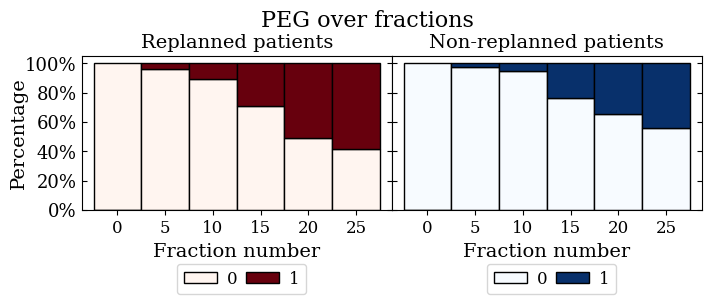

In [66]:
#palette = {50: "lightpink", 60: "pink",70:"lightcoral",80:"crimson",90:"red",100:"maroon"}
#plt.subplots
f,ax = plt.subplots(1,2,figsize=(8,2))
#plt.figure(figsize=(5,2))
#plt.style.use('./apj.mplstyle')
ticks_figure(ax[0])
ticks_figure(ax[1])
plt.subplots_adjust(wspace=0,hspace=0.0)
data.plot.bar(stacked=True,edgecolor="0", width=1,cmap="Reds",ax=ax[0])
dataNR.plot.bar(stacked=True,edgecolor="0", width=1,cmap="Blues",ax=ax[1])

#plt.xlabel("Footballer")
#plt.set_xticks(rotation=0)
ax[0].set_xticks([0,1,2,3,4,5],[0,5,10,15,20,25],rotation=0)
ax[1].set_xticks([0,1,2,3,4,5],[0,5,10,15,20,25],rotation=0)
ax[0].set_yticks([0,20,40,60,80,100],['0%','20%','40%','60%','80%','100%'],fontsize=13)
ax[1].set_yticks([0,20,40,60,80,100],[],fontsize=13)
ax[0].set_ylabel('Percentage',labelpad=-2,fontsize=14)
ax[0].set_xlabel('Fraction number',fontsize=14)
ax[1].set_xlabel('Fraction number',fontsize=14)

ax[0].legend(bbox_to_anchor=(0.28,-0.6),loc='lower left',ncols=4,handletextpad=0.6,columnspacing=0.5)
ax[1].legend(bbox_to_anchor=(0.28,-0.6),loc='lower left',ncols=4,handletextpad=0.6,columnspacing=0.5)
ax[0].set_title('Replanned patients',fontsize=14)
ax[1].set_title('Non-replanned patients',fontsize=14)

#plt.ylabel("Ratings")
plt.text(-3.5,125,'PEG over fractions',fontsize=16)
plt.savefig('Paper/'+"PEG_R"+'.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

data_NR = data_weights[75:]
types = []
for j in list(data_NR.columns):
    values = list(set(list(data_NR[j].values)))
    for l in values:
        types.append(l)
        
kps = sorted(list(set(types)))
#kps.append(4)
total = []
ffx = [0,5,10,15,20,25]
for j in list(data_NR.columns):
    values = list(set(list(data_NR[j].values)))
    countss = []
    for m in kps:
        countp =list(data_NR[j].values).count(m)
        fx = int(j.split('-')[1].split('_')[0])
        if fx in ffx:
            countss.append([fx,m,int(countp)])
        
    total.append(countss)
        
total2 = []
for j in total:
    if len(j)!=0:
        total2.append(j)
        
valuess = []
for j in total2:
    valuess.append(np.array(j)[:,2]*100/75)
    
dataNR = pd.DataFrame(valuess,columns=kps,index=ffx)

In [10]:
kps

[0, 1, 2, 3]

In [11]:
data_weights = pd.read_csv('Xerostomia_filled.csv')
data_NR = data_weights[75:]
types = []
for j in list(data_NR.columns):
    values = list(set(list(data_NR[j].values)))
    for l in values:
        types.append(l)
        
kps = sorted(list(set(types)))
kps.append(4)
total = []
ffx = [0,5,10,15,20,25]
for j in list(data_NR.columns):
    values = list(set(list(data_NR[j].values)))
    countss = []
    for m in kps:
        countp =list(data_NR[j].values).count(m)
        fx = int(j.split('-')[1].split('_')[0])
        if fx in ffx:
            countss.append([fx,m,int(countp)])
        
    total.append(countss)
        
total2 = []
for j in total:
    if len(j)!=0:
        total2.append(j)
        
valuess = []
for j in total2:
    valuess.append(np.array(j)[:,2]*100/75)
    
dataNR = pd.DataFrame(valuess,columns=kps,index=ffx)

<Figure size 500x400 with 0 Axes>

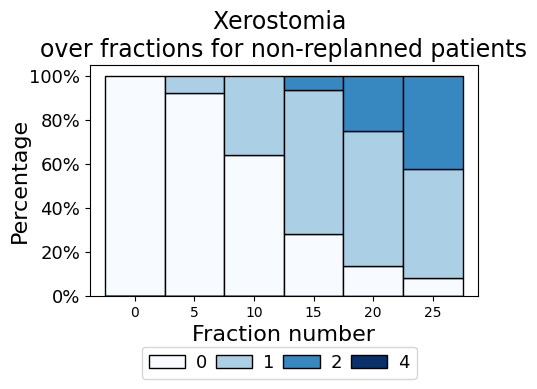

In [15]:
#palette = {50: "lightpink", 60: "pink",70:"lightcoral",80:"crimson",90:"red",100:"maroon"}
plt.figure(figsize=(5,4))
#plt.style.use('./apj.mplstyle')
ax = dataNR.plot.bar(stacked=True,edgecolor="0", width=1,cmap="Blues",figsize=(5,3))
plt.legend(bbox_to_anchor=(0.11,-0.4),loc='lower left',ncols=6,handletextpad=0.6,columnspacing=0.5,fontsize=13)
#plt.xlabel("Footballer")
plt.xticks(rotation=0)
plt.yticks([0,20,40,60,80,100],['0%','20%','40%','60%','80%','100%'],fontsize=13)
plt.ylabel('Percentage',labelpad=-0.5,fontsize=16)
plt.xlabel('Fraction number',fontsize=16)
#plt.ylabel("Ratings")
plt.title('Xerostomia '+'\n'+'over fractions for non-replanned patients',fontsize=17)
#plt.savefig('Thesis/'+"Xerostomia_NR"+'.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

In [16]:
data_R = data_weights[0:75]
types = []
for j in list(data_R.columns):
    values = list(set(list(data_R[j].values)))
    for l in values:
        types.append(l)
        
kps = sorted(list(set(types)))
kps.append(4)
total = []
ffx = [0,5,10,15,20,25]
for j in list(data_R.columns):
    values = list(set(list(data_R[j].values)))
    countss = []
    for m in kps:
        countp =list(data_R[j].values).count(m)
        fx = int(j.split('-')[1].split('_')[0])
        if fx in ffx:
            countss.append([fx,m,int(countp)])
        
    total.append(countss)
        
total2 = []
for j in total:
    if len(j)!=0:
        total2.append(j)
        
valuess = []
for j in total2:
    valuess.append(np.array(j)[:,2]*100/75)
    
data = pd.DataFrame(valuess,columns=kps,index=ffx)

<Figure size 500x400 with 0 Axes>

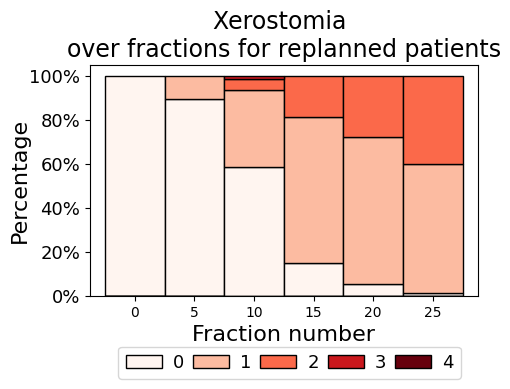

In [22]:
#palette = {50: "lightpink", 60: "pink",70:"lightcoral",80:"crimson",90:"red",100:"maroon"}
plt.figure(figsize=(5,4))
#plt.style.use('./apj.mplstyle')
ax = data.plot.bar(stacked=True,edgecolor="0", width=1,cmap="Reds",figsize=(5,3))
plt.legend(bbox_to_anchor=(0.05,-0.4),loc='lower left',ncols=6,handletextpad=0.6,columnspacing=0.5,fontsize=13)
#plt.xlabel("Footballer")
plt.xticks(rotation=0)
plt.yticks([0,20,40,60,80,100],['0%','20%','40%','60%','80%','100%'],fontsize=13)
plt.ylabel('Percentage',labelpad=-0.5,fontsize=16)
plt.xlabel('Fraction number',fontsize=16)
#plt.ylabel("Ratings")
plt.title('Xerostomia '+'\n'+'over fractions for replanned patients',fontsize=17)
#plt.savefig('Thesis/'+"Xerostomia_R"+'.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

### Metrics data exploration

In [46]:
data_final1 = get_data('PARAMS_120/paramsv2','air_mask',NEWS_R,NEWS_NR)

In [47]:
data_final1[0][2]


,BODY_volume_air,Body-1_volume_air,Body-2_volume_air,Body-3_volume_air,Body-4_volume_air,Body-5_volume_air,Body-6_volume_air,Body-7_volume_air,Body-8_volume_air,Body-9_volume_air,...,Body-16_volume_air,Body-17_volume_air,Body-18_volume_air,Body-19_volume_air,Body-20_volume_air,Body-21_volume_air,Body-22_volume_air,Body-23_volume_air,Body-24_volume_air,Body-25_volume_air
0,178.198798,210.069374,NaN,NaN,191.345411,NaN,184.503806,NaN,229.520995,NaN,...,302.498110,NaN,NaN,NaN,323.079836,NaN,NaN,NaN,NaN,NaN
1,374.050995,253.206110,NaN,339.677269,NaN,NaN,403.147050,NaN,NaN,370.961397,...,NaN,350.943186,NaN,408.543671,431.545050,458.603285,NaN,459.977483,NaN,NaN
2,105.309848,128.139332,NaN,68.220974,NaN,NaN,124.972988,NaN,104.160422,NaN,...,180.496055,NaN,NaN,191.607175,NaN,210.381136,NaN,NaN,NaN,NaN
3,425.668716,321.473122,327.624321,346.158028,342.218399,360.763550,304.919243,379.918098,336.436272,349.888802,...,305.205345,330.891609,369.080544,398.652077,375.566483,NaN,NaN,NaN,NaN,NaN
4,260.433533,280.098202,NaN,NaN,249.436078,NaN,251.938781,NaN,393.702475,NaN,...,434.307229,NaN,NaN,425.359263,NaN,NaN,429.995681,440.772545,NaN,442.906260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,401.756082,391.590563,NaN,NaN,NaN,390.310087,398.127137,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,451.582783,NaN,NaN,NaN
71,250.246294,324.912611,NaN,307.914186,NaN,NaN,314.787754,NaN,279.528516,NaN,...,280.121065,NaN,310.067973,NaN,NaN,329.163506,NaN,NaN,334.697398,NaN
72,475.874831,483.241878,NaN,464.858719,NaN,NaN,462.916655,NaN,NaN,470.590149,...,441.957614,NaN,496.728030,NaN,NaN,524.399378,NaN,583.153612,NaN,NaN
73,442.564531,484.205044,NaN,NaN,466.209603,NaN,438.009218,NaN,484.174646,NaN,...,NaN,491.474438,NaN,NaN,513.782011,NaN,481.182644,NaN,503.698658,NaN


In [5]:
def get_normalized(data):
    df4 = data.copy().T
    nv_df = df4.apply(lambda x: (x/x[0]))
    return nv_df.T

def get_Delta(data):
    df4 = data.copy().T
    nv_df = df4.apply(lambda x: ((x-x[0])/x[0]))
    return nv_df.T

In [11]:
w = pd.read_csv('weights.csv')  
w

,Body-0_weight,Body-1_weight,Body-2_weight,Body-3_weight,Body-4_weight,Body-5_weight,Body-6_weight,Body-7_weight,Body-8_weight,Body-9_weight,...,Body-16_weight,Body-17_weight,Body-18_weight,Body-19_weight,Body-20_weight,Body-21_weight,Body-22_weight,Body-23_weight,Body-24_weight,Body-25_weight
0,97.7,97.400000,97.100000,96.800000,96.500000,97.900000,99.300000,98.050000,96.800000,95.550,...,86.400000,86.400000,86.400000,86.400000,86.400000,86.400000,86.400000,86.40,86.400,86.4
1,65.5,62.400000,62.316667,62.233333,62.150000,62.066667,61.983333,61.900000,61.700000,61.500,...,61.900000,61.950000,62.000000,60.100000,59.100000,58.100000,58.475000,58.85,59.225,59.6
2,68.2,67.750000,67.300000,66.850000,66.400000,65.400000,65.220000,65.040000,64.860000,64.680,...,62.050000,62.000000,61.950000,61.900000,61.900000,61.900000,61.900000,61.90,61.900,61.9
3,55.6,56.271429,56.942857,57.614286,58.285714,58.957143,59.628571,60.300000,60.012500,59.725,...,57.800000,57.600000,57.600000,57.600000,57.600000,57.600000,57.600000,57.60,57.600,57.6
4,73.4,74.200000,75.000000,75.800000,76.600000,75.533333,74.466667,73.400000,71.250000,69.100,...,68.800000,68.800000,68.800000,68.800000,68.540000,68.280000,68.020000,67.76,67.500,67.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,83.0,82.500000,82.000000,81.500000,81.000000,80.500000,80.000000,79.500000,80.880000,82.260,...,84.466667,83.983333,83.500000,82.633333,81.766667,80.900000,80.800000,80.70,80.600,80.5
116,90.5,87.400000,84.300000,84.750000,85.200000,85.650000,86.100000,86.550000,87.000000,86.160,...,81.200000,81.271429,81.342857,81.414286,81.485714,81.557143,81.628571,81.70,81.700,81.7
117,78.0,81.250000,84.500000,84.285714,84.071429,83.857143,83.642857,83.428571,83.214286,83.000,...,81.000000,80.800000,80.600000,80.400000,80.200000,80.000000,79.800000,79.80,79.800,79.8
118,107.7,106.450000,105.200000,105.140000,105.080000,105.020000,104.960000,104.900000,104.120000,103.340,...,103.200000,103.750000,104.300000,104.140000,103.980000,103.820000,103.660000,103.50,103.500,102.6


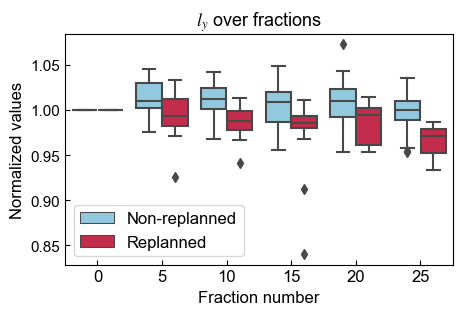

In [77]:
plt.style.use('./apj.mplstyle')
#$VI_I-$
violin_all_2(df_RR,df_NRR,data_final1[1][1],data_final1[1][0],data_final1[1][0],[0,5,10,15,20,25],r'''$l_{y}$''') 

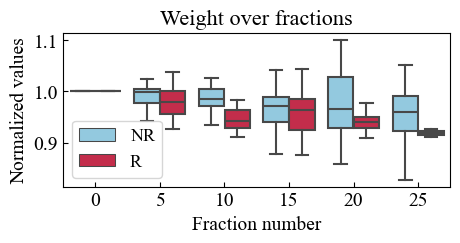

In [18]:
data_weights = pd.read_csv('weight_raw2.csv')
rR = 75
df_R = data_weights[0:int(rR)]
df_NR = data_weights[int(rR):] #0.001

df_RR = df_R.copy().T.apply(lambda x: (x/x[0])).T
df_NRR = df_NR.copy().T.apply(lambda x: (x/x[0])).T

violin_all_2(df_RR,df_NRR,list(data_weights.columns),'weight','weight',[0,5,10,15,20,25],'Weight')


In [66]:
#result1 = data_final1[1][-1].copy()
xvals = np.array(df_NR.mean()[:].values)
yvals = np.array([i for i in range(0,26)])
#assert len(xvals) == len(yvals)
    #if len(xvals) > 0:
best_fit = LinearRegression().fit(xvals.reshape(-1, 1), yvals.reshape(-1, 1))
slope = best_fit.coef_[0][0]
slope

-0.07676641456903746

In [67]:
#result1 = data_final1[1][-1].copy()
xvals = np.array(df_R.mean()[:].values)
yvals = np.array([i for i in range(0,26)])
#assert len(xvals) == len(yvals)
    #if len(xvals) > 0:
best_fit = LinearRegression().fit(xvals.reshape(-1, 1), yvals.reshape(-1, 1))
slope = best_fit.coef_[0][0]
slope

-0.47234899580870143

In [31]:
def get_slope_data(set1,parameter,result,bodies_set):
    data_Set = result[["patient_num"]+set1[0:]]
    data_Set.columns = ['patient_num']+bod
    ies_set[0:]
    df_vy_slope = get_paramSlope_df_from_param_df(data_Set,parameter)
    return df_vy_slope

def get_slope_datav2(set1,parameter,result,bodies_set):
    data_Set = result[["patient_num"]+set1[0:]]
    data_Set.columns = ['patient_num']+bodies_set[0:]
    df_vy_slope,coeffs = get_paramSlope_df_from_param_dfv2(data_Set,parameter)
    return df_vy_slope,coeffs


def sort_body_keys(keys_body): #Get body keys de la RT structure
    new_keys_body = []
    nums = []
    for key in set(keys_body):
        str_frac_num = key.split('-')[-1]
        if not str_frac_num.lower() == 'body':
            nums.append(int(str_frac_num))
        else:
            new_keys_body.append(key)
    nums = sorted(nums)
    for num in nums:
        for key in keys_body:
            if str(num) == key.split('-')[-1]:
                new_keys_body.append(key)        
    return new_keys_body

def get_domain_from_keys(keys):
    xvals = []
    for key in keys:
        print(key)
        if 'body' not in key.lower():
            print('Key does not contain the word \'body\': ' + key)
        split_key = key.split('_')[-1].split('-')
        if len(split_key)==1 and 'body' in split_key[0].lower():
            xvals.append(0)
        if len(split_key)>1 and 'body' in split_key[0].lower():
            xvals.append(int(split_key[-1]))
    return np.array(xvals)

#----------------------------------------  
def get_patient_slope_for_num_fx(row_data, num_fx, fx_start=1):
    # print(row_data)
    idx_col = num_fx+1 # +1 because fx 1 has column index 2
    idx_start = fx_start+1
    row_data_trim = row_data[idx_start-1:idx_col+1].dropna() 
        # -1 because previous column is used to calculate first slope
        # +1 because last index specified is excluded
    # print(row_data_trim)
    xvals = get_domain_from_keys(row_data_trim.keys())
    yvals = row_data_trim.values
    assert len(xvals) == len(yvals)
    if len(xvals) > 0:
        best_fit = LinearRegression().fit(xvals.reshape(-1, 1), yvals.reshape(-1, 1))
        slope = best_fit.coef_[0][0]
    else:
        slope = np.NAN
    return slope

#---------------------------------------
# column: body keys
# row: parameter
def get_param_df_for_patients(path_src, patient_list, param_name, param_row_num=0):
    data_dict = {'patient_num':[]}
    body_keys = []
    for patient_num in patient_list:
        dict_patient = get_param_value_dict_for_patient(path_src, patient_num, param_row_num)
        body_keys = list(set(body_keys + list(dict_patient.keys())))
    sorted_body_keys = sort_body_keys(body_keys)
    for body_key in sorted_body_keys:
        key = param_name + '_' + body_key
        data_dict[key] = []
    # print(data_dict)
    for patient_num in patient_list:
        data_dict['patient_num'].append(str(patient_num))
        dict_patient = get_param_value_dict_for_patient(path_src, patient_num, param_row_num)
        # print(dict_patient)
        for body_key in sorted_body_keys:
            key = param_name + '_' + body_key
            # print(body_key)
            if body_key in dict_patient.keys():
                data_dict[key].append(dict_patient[body_key])
            else:
                data_dict[key].append(np.nan)
    df = pd.DataFrame(data_dict)
    return df

def get_paramSlope_df_from_csv_individual(path_src, patient_list, param_name, param_row_num=0, fx_start=1):
    df_param = get_param_df_for_patients(path_src, patient_list, param_name, param_row_num)
    df_slope = get_paramSlope_df_from_param_df(df_param, fx_start)
    return df_slope

def get_paramSlope_df_from_csv_all(path_src_csv, patient_list, fx_start=1):
    df_param = pd.read_csv(path_src_csv)
    df_slope = get_paramSlope_df_from_param_df(df_param, fx_start)
    return df_slope

def get_paramSlope_df_from_param_df(df_param, fx_start=1):
    data_dict_slope = {'patient_num':[]}
    idx_fx_start = fx_start+1
    for column_name in df_param.keys()[idx_fx_start:]:
        key = column_name.split('_')[0]+'-slope_' + '_'.join(column_name.split('_')[1:])
        data_dict_slope[key] = []
    for idx_patient in range(len(df_param.values)):
        row_data = df_param.iloc[idx_patient]
        data_dict_slope['patient_num'].append(row_data['patient_num'])
        for i, key in enumerate(list(data_dict_slope.keys())[1:]): # key at index 0 is patient_num so we start at 1 
            num_fx = fx_start + i
            slope = get_patient_slope_for_num_fx(row_data, num_fx, fx_start)
            data_dict_slope[key].append(slope)
    df_slope = pd.DataFrame(data=data_dict_slope)
    return df_slope

def get_paramSlope_df_from_param_df(df_param, param,fx_start=1):
    data_dict_slope = {'patient_num':[]}
    idx_fx_start = fx_start+1
    for column_name in df_param.keys()[idx_fx_start:]:
        key = column_name.split('_')[0]+'-slope_' + param + '_'.join(column_name.split('_')[1:])
        data_dict_slope[key] = []
    for idx_patient in range(len(df_param.values)):
        row_data = df_param.iloc[idx_patient]
        
        data_dict_slope['patient_num'].append(row_data['patient_num'])
        for i, key in enumerate(list(data_dict_slope.keys())[1:]): # key at index 0 is patient_num so we start at 1 
            num_fx = fx_start + i
            slope = get_patient_slope_for_num_fx(row_data, num_fx, fx_start)
            data_dict_slope[key].append(slope)
    df_slope = pd.DataFrame(data=data_dict_slope)
    return df_slope

def get_domain_from_keys(keys):
    xvals = []
    for key in keys:
        if 'body' not in key.lower():
            print('Key does not contain the word \'body\': ' + key)
        split_key = key.split('_')[-1].split('-')
        if len(split_key)==1 and 'body' in split_key[0].lower():
            xvals.append(0)
        if len(split_key)>1 and 'body' in split_key[0].lower():
            xvals.append(int(split_key[-1]))
    return np.array(xvals)

In [7]:
def get_bonferroni_long(df_slope,set1,patients_R,patients_NR,parameter,parameter2):
    #data_slope = data_slope[["patient_num"]+set1]
    rR = len(patients_R)
    rNR = len(patients_NR)
    
    
    df_slope.columns = ['patient_num']+set1[:]
    df_R = df_slope[0:int(rR)]
    df_NR = df_slope[int(rR):]
    R = ['R' for i in range(0,int(rR))]
    NR = ['NR' for i in range(0,int(rNR))]
    RRR = R + NR
    df_slope.insert(1,"replanned",RRR)
    df_slope.columns = ['patient_num']+['replanned']+set1[:]
    
    
    datos=[]

    for j in set1[:]:
        val = df_slope[j].values
        for k in range(0,len(val)):
            fx=int(j.split('-')[-1].split('_')[0])
            datos.append([df_slope['patient_num'][k],df_slope['replanned'][k],fx,val[k]])

    datoss = pd.DataFrame(datos,columns=['ID','RvsNR','fx','slope'])
    
    fxs,test = test_umw(df_R,df_NR,set1[:],parameter,parameter)
    pairs = [[(1, 'R'), (1, 'NR')],[(2, 'R'), (2, 'NR')],[(3, 'R'), (3, 'NR')],[(4, 'R'), (4, 'NR')],
        [(5, 'R'), (5, 'NR')],[(6, 'R'), (6, 'NR')],[(7, 'R'), (7, 'NR')],[(8, 'R'), (8, 'NR')],
        [(9, 'R'), (9, 'NR')],[(10, 'R'), (10, 'NR')],[(11, 'R'), (11, 'NR')],[(12, 'R'), (12, 'NR')],[(13, 'R'), (13, 'NR')],
        [(14, 'R'), (14, 'NR')],[(15, 'R'), (15, 'NR')],[(16, 'R'), (16, 'NR')],[(17, 'R'), (17, 'NR')],[(18, 'R'), (18, 'NR')],
    [(19, 'R'), (19, 'NR')],[(20, 'R'), (20, 'NR')],[(21, 'R'), (21, 'NR')],[(22, 'R'), (22, 'NR')],[(23, 'R'), (23, 'NR')],
    [(24, 'R'), (24, 'NR')],[(25, 'R'), (25, 'NR')]]

    ff,ax = plt.subplots(1,1,figsize=(10,5))
    sns.boxplot(data=datoss, x="fx", y='slope', hue='RvsNR',palette={"R": "red", "NR": "dodgerblue"},ax=ax)

    ax.set_yscale('symlog',linthresh=1e-1)
    annotator = Annotator(ax, pairs, data=datoss,  x="fx", y='slope', hue='RvsNR')
    annotator.configure(test='Mann-Whitney', text_format='star',loc='inside',comparisons_correction='bonferroni')

    annotator.apply_and_annotate()
    test_results = annotator.apply_test()
    ax.legend(ncols=2)
    ax.set_xlabel('   ')
    ax.set_ylabel(r'Values',fontsize=15,labelpad=-2)
    ax.set_xlabel('Fraction number',fontsize=15)
    ax.legend([],[],frameon=False)

    ax.set_title(r'Mann-Whitney U test for '+parameter2,fontsize=15)

    plt.show()

In [20]:
data_final1 = get_data('PARAMS_120/paramsv2','Rmin_Rmax_v3_pxv2',NEWS_R,NEWS_NR)#data_final1 = get_data('PARAMS_120/params','submand_area_px',NEWS_R,NEWS_NR)
n=1
result1 = data_final1[n][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[n][1]
parameter = data_final1[n][0]
print(parameter)

Rmin


In [21]:
import pandas as pd

In [91]:
def violin_all_2(df_vys_R,df_vys_NR,set1,param,param2,fxs1,title):
    colorr = {"replanned": "red", "non-replanned": "dodgerblue"}
    color2 = 'tab:skyblue'
    color3 = 'tab:pink'
    
    f_xs = [str(i) for i in range(0,max(fxs1)+1,5)]
    f_x2 = [int(i) for i in range(0,max(fxs1)+1,5)]
    test = []
    values_NR = []
    values_R = []
  
    fxs = []
    values_NR2 = []
    values_R2 = []
  
    for head in set1[:]:
        if '_' in param2:  
            param3=param2.split('_')
        else:
            param3=[param2]
        if head.split('_')[1:]==param3:
            fx = head.split('-')[-1].split('_')[0]
            
            if fx=='BODY':
                fxs.append(int(0))
                values_1 = list(df_vys_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
            
                values = [['R',0,i] for i in cleanedList_1]
                values_R.append(values)
                    
                values_2 = list(df_vys_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']
                 
                values2 = [['NR',0,i] for i in cleanedList_2]
                values_NR.append(values2)
                #values2 = [['NR',fx,0] for i in cleanedList_2]
                values9 = [['NR',0,i] for i in cleanedList_2]
                values8 = [['R',0,i] for i in cleanedList_1]
                values_NR2.append(values9)
                values_R2.append(values8)
            else: 
                
                fxs.append(int(fx)) 
                values_1 = list(df_vys_R[head])
                cleanedList_1 = [float(x) for x in values_1 if str(x) != 'nan']
                 
                values = [['R',int(fx),i] for i in cleanedList_1]
                values8 = [['R',int(fx),i] for i in cleanedList_1]
                values_R.append(values)
                
                values_2 = list(df_vys_NR[head])
                cleanedList_2 = [float(x) for x in values_2 if str(x) != 'nan']
 
                values2 = [['NR',int(fx),i] for i in cleanedList_2]
                values9 = [['NR',int(fx),i] for i in cleanedList_2]
                values_NR.append(values2)
                if fx in f_xs:
                    values_NR2.append(values9)
                    values_R2.append(values8)

    data = []
    for i in values_NR:
        for j in i:
            data.append(j)
            
    for i in values_R:
        for j in i:
            data.append(j)
        
    data3 = []
   
    for i in values_NR2:
        for j in i:
            data3.append(j)
    
    for i in values_R2:
        for j in i:
            data3.append(j)
            
    #data2 = pd.DataFrame(data,columns=[param,'fx','class'])/values_R2
    #data4 = pd.DataFrame(data3,columns=[param,'fx','class'])/values_R2[0]
    #datoss = pd.DataFrame(datos,columns=['ID','RvsNR','fx','slope'])
    data4 = pd.DataFrame(data3,columns=['class','fx','param'])
    
    fig, ax = plt.subplots(1,1,figsize=(5,3))
    sns.boxplot(data=data4, x='fx', y='param', hue='class',showfliers=False,palette={"R": "crimson", "NR": "skyblue"},ax=ax)
    #sns.boxplot(data=data4,  x='fx', y=param, hue='class',ax=ax[0],scale_hue=True,palette=colorr,split=True, inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    #ax.plot([],[],',',label=r'slope: 67.3/fx',markersize=0)
    #ax.plot([],[],',',label=r'slope: 45.4/fx',markersize=0)
    #ax.set_ylabel(r'Normalized values',fontsize=12)
    ax.set_ylabel(r'Distance value',fontsize=14)
    #ax.legend(loc='upper left',ncols=2)#,columnspacing=-1)
    ax.set_xlabel('Fraction number',fontsize=14)
    #ax.set_yscale('log')
    #ax.set_yscale('symlog',linthresh=1e-1)
    ax.tick_params(axis='x',direction='in',labelsize=14)
    ax.tick_params(axis='y',direction='in',labelsize=14)
    #ax.set_yticks([0.9,1.0,1.1,1.2,1.3])
    ax.legend(fontsize=13)#,loc='upper left')
    ax.set_title(title+' over fractions',fontsize=16)
    #ax.set_yscale('symlog',linthresh=1e-4)
    #ax.set_ylim(0.9,1.2)
    ##print(param2)
    if '/' in param2:
        #print('kk')
        para9 = param2.split('/')
        param = para9[0]+'_'+para9[1]
        
        plt.savefig(param+'-Copy_.png',dpi=300,bbox_inches='tight')
        plt.show()
    else:
        param = param2
        #plt.show()
        plt.savefig(param2+'-Copy_.png',dpi=300,bbox_inches='tight')
        plt.show()

In [72]:
data_final1 = get_data('PARAMS_120/paramsv2','distancesv2',NEWS_R,NEWS_NR)#data_final1 = get_data('PARAMS_120/params','submand_area_px',NEWS_R,NEWS_NR)
n=1
result1 = data_final1[n][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[n][1]
parameter = data_final1[n][0]
print(parameter)

chamber


In [62]:
#data_final1 = get_data('PARAMS_120/params','submand_area_px',NEWS_R,NEWS_NR)
n=0
result1 = data_final1[n][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[n][1]
parameter = data_final1[n][0]
print(parameter)

volume_air


In [65]:
plt.style.use('./apj.mplstyle')
rR = 75

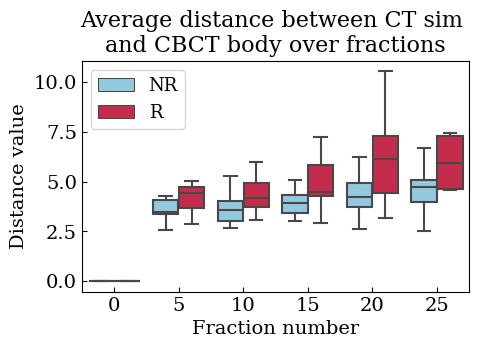

In [78]:
plt.style.use('./apj.mplstyle')
#$VI_I-$
df_R = data_final1[n][-1][0:int(rR)]
df_NR = data_final1[n][-1][int(rR):] #0.001
#df_RR = df_R.copy().T.apply(lambda x: (x/x[0])).T
#df_NRR = df_NR.copy().T.apply(lambda x: (x/x[0])).T

violin_all_2(df_R,df_NR,data_final1[n][-1],data_final1[n][1],data_final1[n][0],[0,5,10,15,20,25],r'''Average distance between CT sim 
and CBCT body''') 

In [16]:
rR = 75

In [33]:
def get_bonferroni_short_2(parameter,parameter2,df_slope,patients_R,patients_NR,set1,factor,title):
    rR = len(patients_R)
    rNR = len(patients_NR)
    df_slope.columns = ['patient_num']+set1[:]
    df_R = df_slope[0:int(rR)]
    df_NR = df_slope[int(rR):]
    R = ['R' for i in range(0,int(rR))]
    NR = ['NR' for i in range(0,int(rNR))]
    RRR = R + NR
    df_slope.insert(1,"replanned",RRR)
    
    df_slope.columns = ['patient_num']+['replanned']+set1[:]
    #df_slope.columns=['patient_num']+['replanned']+set1[:]
    datos=[]

    rR = len(patients_R)
    rNR = len(patients_NR)
    rT = rR+rNR
    for j in ['Body-1_'+parameter,'Body-5_'+parameter,'Body-6_'+parameter,'Body-15_'+parameter,'Body-20_'+parameter,'Body-25_'+parameter]:
        val = df_slope[j].values
        for k in range(0,len(val)):
            fx=int(j.split('_')[0].split('-')[1])
            datos.append([df_slope['patient_num'][k],df_slope['replanned'][k],fx,val[k]])
    df_R = df_slope[0:rR]
    df_NR = df_slope[rR:]
    datoss = pd.DataFrame(datos,columns=['ID','RvsNR','fx','slope'])
    #fxs,test = test_umw(df_R,df_NR,set1[1:],parameter,parameter)
    
    pairs = [[(1, 'R'), (1, 'NR')],
         [(5, 'R'), (5, 'NR')],
        [(6, 'R'), (6, 'NR')],
        [(15, 'R'), (15, 'NR')],
        [(20, 'R'), (20, 'NR')],
        [(25, 'R'), (25, 'NR')]]

    stat_results = [mannwhitneyu(df_slope['Body-1_'+parameter][0:rR], df_slope['Body-1_'+parameter][rR:]),
        mannwhitneyu(df_slope['Body-5_'+parameter][0:rR], df_slope['Body-5_'+parameter][rR:]),
               mannwhitneyu(df_slope['Body-6_'+parameter][0:rR], df_slope['Body-6_'+parameter][rR:]),
                mannwhitneyu(df_slope['Body-15_'+parameter][0:rR], df_slope['Body-15_'+parameter][rR:]),
                    mannwhitneyu(df_slope['Body-20_'+parameter][0:rR], df_slope['Body-20_'+parameter][rR:]),
                mannwhitneyu(df_slope['Body-25_'+parameter][0:rR], df_slope['Body-25_'+parameter][rR:])]

    pvalues = [result.pvalue for result in stat_results]
    formatted_pvalues = [f"p={p:.02}" for p in pvalues]
    print(stat_results)
    ff,ax = plt.subplots(1,1,figsize=(5,3))
    sns.boxplot(data=datoss, x="fx", y='slope', hue='RvsNR',palette={"R": "hotpink", "NR": "powderblue"},ax=ax)

    ax.set_yscale('symlog',linthresh=1e-1)
  

    #ax.set_ylim(-10,5000)
    ax.set_xlabel('Fraction number',fontsize=14)
    ax.set_ylim(-1e4,1e4)
    ax.set_yticks([-1e3,-1e0,0,1e0,1e3])
    ax.set_ylabel(r'Slope values (mm$^2$/fx)',fontsize=14,labelpad=0)
    ticks_figure(ax)
    #ax.legend(loc="lower right",ncols=2,fontsize=15)
    ax.legend(loc="lower center",ncols=2,fontsize=13,columnspacing=0.5,handletextpad=0.35)
    #ax.set_title(r'$D_{Body}$ rate of change'+'\n'+'and Mann-Whitney U test',fontsize=13)
    ax.set_title(title+r'',fontsize=16)
  
    xs = [[-0.3,-0.3,0.3,0.3],[0.7,0.7,1.3,1.3],[1.7,1.7,2.3,2.3],[2.7,2.7,3.3,3.3],[3.7,3.7,4.3,4.3],[4.7,4.7,5.3,5.3]]
    ys = factor*np.array([[10**1.5,10**(2),10**(2),10**1.5],[10**(1.5),10**(2),10**(2),10**(1.5)],[10**(1.5),10**(2),10**(2),10**(1.5)],[10**(1.5),10**(2),10**(2),10**(1.5)],[10**(1.5),10**(2),10**(2),10**(1.5)],[10**(1.5),10**(2),10**(2),10**(1.5)]])
    symbols = ['ns','ns','*','*','*','*']
    fxs = [0,1,2,3,4,5]
  
    ax.tick_params(axis='x',direction='in',labelsize=14)
    ax.tick_params(axis='y',direction='in',labelsize=14)
    #text_height = bar_height + (y_range * 0.01)
    col = ['k','k','r','k','k','k']
    for s in range(0,len(symbols)):
        plt.plot(xs[s],ys[s], lw=1, c=col[s])
        #text_height = bar_height + (y_range * 0.01)
        #bar_height = (y_range * 0.07 * level) + top
        plt.text(fxs[s], factor*10**(2), symbols[s], ha='center', va='bottom', c=col[s])
    
    if '/' in parameter:
        para9 = parameter.split('/')
        parameter = para9[0]+'_'+para9[1]
        
    plt.gca().get_xticklabels()[2].set_color("r")
    plt.savefig(parameter+'_slope_UMW.png',dpi=300,bbox_inches='tight',pad_inches=0.2)
    plt.show() 


In [79]:
bodies_set = ['Body-'+str(i) for i in range(1,26)]
bodies_set.insert(0,'BODY')
gc.collect()

5692

In [28]:
data_final1 = get_data('PARAMS_120/paramsv2','submand_area_px',NEWS_R,NEWS_NR)#data_final1 = get_data('PARAMS_120/params','submand_area_px',NEWS_R,NEWS_NR)
n=0
result1 = data_final1[n][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[n][1]
parameter = data_final1[n][0]
print(parameter)

area


In [84]:
data_slope2 = pd.read_csv('weight_slope2.csv')
data_slope2.insert(0,"patient_num",NEWS_R+NEWS_NR)

In [29]:
plt.style.use('./apj.mplstyle')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_R vs. 10_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.543e-02 U_stat=1.963e+03
11_R vs. 11_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.695e-03 U_stat=1.868e+03
12_R vs. 12_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.184e-03 U_stat=1.825e+03
13_R vs. 13_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.176e-03 U_stat=1.768e+03
14_R vs. 14_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.813e-03 U_stat=1.820e+03
15_R vs. 15_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.176e-03 U_stat=1.768e+03
16_R vs. 16_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.860e-03 U_stat=1.758e+03
17_R vs. 1

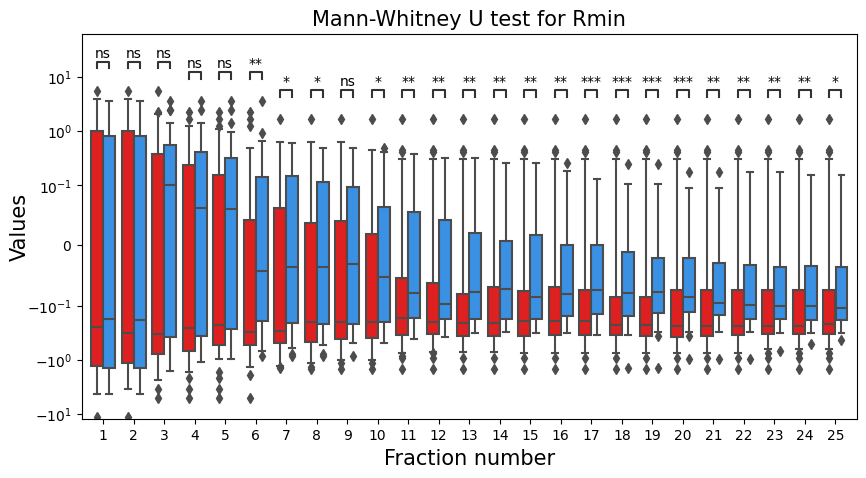

In [25]:
get_bonferroni_long(data_slope.copy(),set1[1:26],NEWS_R,NEWS_NR,parameter,parameter)

[MannwhitneyuResult(statistic=2839.0, pvalue=0.9221491348050245), MannwhitneyuResult(statistic=2058.0, pvalue=0.004595770651619502), MannwhitneyuResult(statistic=1819.0, pvalue=0.00018965135544797245), MannwhitneyuResult(statistic=1768.0, pvalue=8.705026432855713e-05), MannwhitneyuResult(statistic=1718.0, pvalue=3.921642141738036e-05), MannwhitneyuResult(statistic=1871.0, pvalue=0.0004047564563959977)]


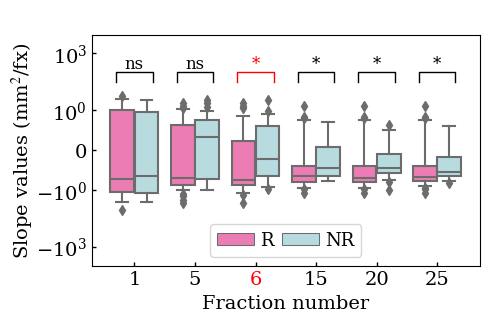

In [34]:
#Maximum distance CT sim'+'\n'+'body and CBCT body’s rate of'+'\n'+'change
#Submandibulat lateral distance s rate of
#change and Mann-Whitney U test
#Minimum PTV-to-body distance’s rate of'+'\n'+'change'
get_bonferroni_short_2(parameter,parameter,data_slope.copy(),NEWS_R,NEWS_NR,set1[1:26],10e-1,r''' ''')

In [67]:
 def get_delta_replannedv1(PATIENTS_R_ALL,result,header,replanned_fx,rR,parameter):
    data_fx_replanned = []
    delta_fx_replanned = []
    delta_fx_replanned2 = []
    Replanns = result.copy()[header[0:26]][0:rR]
    Replanns.insert(0,'patients_num',PATIENTS_R_ALL)
   
    for j in range(0,len(replanned_fx)):
        for h in list(Replanns.columns[2:]):
            if h.split('_')[0]=='BODY':
                fx = 0
            else:
                fx = int(h.split('_')[0].split('-')[1])            
            if replanned_fx[j]==fx:
                for m in (Replanns[['patients_num',Replanns.columns[1],h]].values):
                    if m[0]==PATIENTS_R_ALL[j]:
                        data_fx_replanned.append(m[2])
                        delta_fx_replanned.append((np.abs(m[2]-m[1])/m[1])*100)
                        delta_fx_replanned2.append(((m[2]-m[1])/m[1])*100)
#            data_fx_replanned.append()
            
    ff,ax = plt.subplots(1,1,figsize=(5,2))
    ax.hist(delta_fx_replanned2,color='crimson',bins=7,alpha=0)

    ax.set_title(r'$\Delta\%$'+ 'Body volume at request'+'\n' +'replan fraction',fontsize=16)
    ax.set_xlabel(r'Values ($\%$)',fontsize=14)
    ax.set_ylabel('Number of patients',fontsize=14)
    #ax.set_xticks([i for i in range(-25,6,5)])
    ax.axvline(x = np.mean(delta_fx_replanned2),color='black',label='mean: '+str(round(np.mean(delta_fx_replanned2),2))+r'$\%$')
    ax.axvline(x = np.median(delta_fx_replanned2),color='deepskyblue',label='median: '+str(round(np.median(delta_fx_replanned2),2))+r'$\%$')
    ax.legend()
    plt.savefig('Hist_'+parameter+'.pdf',dpi=300,bbox_inches='tight')
    plt.show()


In [68]:
def get_delta_replanned(PATIENTS_R_ALL,result,header,replanned_fx,rR,parameter,set1,title):
    data_fx_replanned = []
    delta_fx_replanned = []
    delta_fx_replanned2 = []
    
    #Replanns = result.copy()[header[0:26]][0:rR]
    #Replanns.insert(0,'patients_num',PATIENTS_R_ALL)
    
    data_delta = get_Delta(result[set1[0:]].copy())
    #print(data_delta)
    Replanns = data_delta[0:75].T.interpolate().T
    #print(Replanns)
    Replanns.insert(0,'patients_num',PATIENTS_R_ALL)
    for j in range(0,len(replanned_fx)):
        for h in list(Replanns.columns[1:]):
            if h.split('_')[0]=='BODY':
                fx = 0
            else:
                fx = int(h.split('_')[0].split('-')[1])   
            #print(replanned_fx[j])
            if replanned_fx[j]==fx:
                for m in (Replanns[['patients_num',Replanns.columns[1],h]].values):
                    if m[0]==PATIENTS_R_ALL[j]:
                        delta_fx_replanned2.append(m[2]*100)
    #print((delta_fx_replanned2))
    ff,ax = plt.subplots(1,1,figsize=(5,3))
    #bin_nu = (np.abs(np.max(delta_fx_replanned2))-np.abs(np.min(delta_fx_replanned2)))/len(delta_fx_replanned2)
    #print(delta_fx_replanned2)
    #print(delta_fx_replanned2)
 
    ax.hist(delta_fx_replanned2,color='crimson',bins=10,alpha=0.7,edgecolor='crimson',linewidth=1.5)
    
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(r'$\Delta$Values ($\%$)',fontsize=14)
    ax.set_ylabel('Number of patients',fontsize=14)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    
    #ax.set_yticks([0,5,10,15,20,25])
    #ax.set_xticks([i for i in range(-25,6,5)])
    ax.axvline(x = np.mean(delta_fx_replanned2),color='black',linewidth=3,label='Mean: '+str(round(np.mean(delta_fx_replanned2),1))+r'$\%$')
    ax.axvline(x = np.median(delta_fx_replanned2),color='deepskyblue',linewidth=3,label='Median: '+str(round(np.median(delta_fx_replanned2),1))+r'$\%$')
    ax.legend(fontsize=13)
    plt.savefig('Hist_'+parameter+'_.png',dpi=300,bbox_inches='tight')
    #plt.savefig('Hist_Rmax_Rmin.pdf',dpi=500,bbox_inches='tight')
    plt.show()
    
def get_Delta(data):
    df4 = data.copy().T
    nv_df = df4.apply(lambda x: ((x-x[0])/x[0]))
    return nv_df.T

In [11]:
data_patient = pd.read_csv('Patient_Cohort8.csv',low_memory=False) 

In [12]:
replan_fxs = data_patient['request_replan_fx'][0:75]

In [73]:
data_final1 = get_data('PARAMS_120/paramsv2','air_mask',NEWS_R,NEWS_NR)


In [76]:
n=0
result1 = data_final1[n][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[n][1]
parameter = data_final1[n][0]
print(parameter)

volume_air


In [77]:
gc.collect()
plt.style.use('./apj.mplstyle')


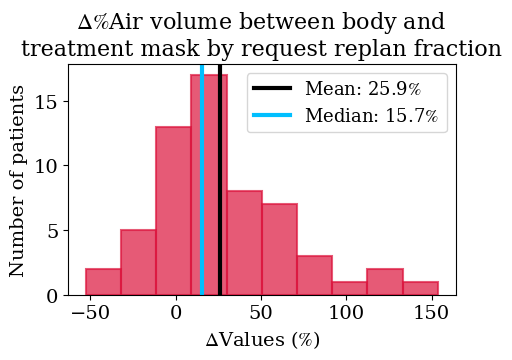

In [78]:
get_delta_replanned(NEWS_R,data_final1[0][2],set1[0:],replan_fxs,75,parameter,set1[0:],r'''$\Delta\%$Air volume between body and 
treatment mask by request replan fraction''')

In [58]:
def get_graphs_clinical_up_to_fx(data_clinical,result,header,category,parameter,replanned_fx,rR,NEWS_R,NEWS_NR,fx,yylabel,title):
    data_groups =data_clinical[category][0:rR]

    data_delta = get_Delta(result[header[0:]].copy())
    Replanns = data_delta[header[0:fx+1]][0:rR].T.interpolate().T
    
    Replanns.insert(0,'patients_num',NEWS_R)
    
    
    #Replanns = result.copy()[header[0:fx+1]][0:rR].T.interpolate().T
    #Replanns.insert(0,'patients_num',NEWS_R)
    
    Replanns.insert(1,category,data_patient[category])
    
    #No_Replanns = result.copy()[header[0:fx+1]][rR:].T.interpolate().T
    No_Replanns = data_delta[header[0:fx+1]][rR:].T.interpolate().T
    No_Replanns.insert(0,'patients_num',NEWS_NR)
    No_Replanns.insert(1,category,data_patient[category])
    
    data_replanned2 = []
    delta_fx_replanned = []
    delta_fx_replanned2 = []
    data_replanned = []
    #print(Replanns[['patients_num',Replanns.columns[1],Replanns.columns[2],Replanns.columns[-1]]].values)
    #print(Replanns)
    for m in (Replanns[['patients_num',Replanns.columns[1],Replanns.columns[2],Replanns.columns[-1]]].values):
        #print(m[2])
        if m[2]!=0:                    
            delta_fx_replanned2.append(float(m[3])*100)
            data_replanned.append([m[0],m[1],(float(m[3])*100),'replanned'])
        else:
            data_replanned.append([m[0],m[1],float(m[3])*100,'replanned'])
                
    #print(Replanns[['patients_num',Replanns.columns[1],Replanns.columns[2],Replanns.columns[-1]]].values)
    delta_fx_no_replanned= []
    delta_fx_no_replanned2 = []
    data_no_replanned = []
    data_no_replanned2 = []
    for m in (No_Replanns[['patients_num',No_Replanns.columns[1],No_Replanns.columns[2],No_Replanns.columns[-1]]].values):
       
        if m[2]!=0:                    
            #delta_fx_no_replanned.append((np.abs(m[3]-m[2])/m[2])*100)
            delta_fx_no_replanned2.append(float(m[3])*100)
            data_no_replanned.append([m[0],m[1],float(m[3])*100,'non-replanned'])
        else:
            data_no_replanned.append([m[0],m[1],float(m[3])*100,'non-replanned'])
    
    
    data_rr = pd.DataFrame(data_replanned)
    #print(data_rr)
    data_rr.columns = ['patient_num',category,'dR','class']
    data_nr = pd.DataFrame(data_no_replanned)
    data_nr.columns = ['patient_num',category,'dR','class']
    #print(data_rr)
    frames = [data_rr, data_nr]
    result_todo = pd.concat(frames)
    #result2
    plt.figure(figsize=(5,3))
    ax = plt.axes()
    #print(result_todo)
    sns.boxplot(data=result_todo, x='dR',y=category,hue='class',palette={"replanned": "lightcoral", "non-replanned": "skyblue"})
    
    plt.legend()
    plt.xlabel(r'values ($\%$)',fontsize=12)
    #plt.yticks(rotation=90)
    #plt.yticks(ha='center')
    plt.setp( ax.yaxis.get_majorticklabels(), rotation=90, ha="center", rotation_mode="anchor") 

    #plt.
    #ax.set_yticklabels(labelpad=-1)
    
    plt.ylabel(yylabel,fontsize=12)
    #plt.title(r'$\Delta\%$Median Body-to-PTV distance'+'\n'+'at fraction '+str(fx),fontsize=13)
    plt.title(title+'by fraction '+str(fx),fontsize=13)

    #plt.title(r'$\Delta\%$Body volume at fraction 15',fontsize=13)
    plt.savefig('Thesis/'+category+'_'+parameter+'_'+str(fx)+'.pdf',dpi=500,bbox_inches='tight')
    plt.show()
   

### Example metric vs clinical feature

In [59]:
data_patient = pd.read_csv('Patient_Cohort8.csv') 

In [60]:
replan_fxs = data_patient['request_replan_fx'][0:60]

In [61]:
data_final1 = get_data('PARAMS_120/params','air_mask',NEWS_R,NEWS_NR)

In [62]:
data_final1 = get_data('PARAMS_120/params','air_mask',NEWS_R,NEWS_NR)
result1 = data_final1[0][-1].copy()
result1.insert(0,"patient_num",NEWS_R+NEWS_NR)
set1 = data_final1[0][1]
parameter = data_final1[0][0]
print(parameter)

volume_air


In [63]:
get_graphs_clinical_up_to_fx(data_patient,result1.copy(),set1[1:],'p16',parameter,replan_fxs,60,NEWS_R,NEWS_NR,10,'p16 result',r'$\Delta\%$$V^{air}_{Body-to-Mask}$ ')

NameError: name 'get_Delta' is not defined

### Kruskal Wallis Test

In [39]:
def get_KW_replan_fx(data_clinical,result,header,category,parameter,replanned_fx,rR,NEWS_R):
    data_groups =data_clinical[category][0:rR]
    
    Replanns = result.copy()[header[0:26]][0:rR].T.interpolate().T
    Replanns.insert(0,'patients_num',NEWS_R)
    
    delta_fx_replanned = []
    delta_fx_replanned2 = []
    for j in range(0,len(replanned_fx)):
        for h in list(Replanns.columns[2:]):
            if h.split('_')[0]=='BODY':
                fx = 0
            else:
                fx = int(h.split('_')[0].split('-')[1])            
            if replanned_fx[j]==fx:
                for m in (Replanns[['patients_num',Replanns.columns[1],h]].values):
                    if m[0]==NEWS_R[j]:
                        delta_fx_replanned.append(m[2])
                        #delta_fx_replanned.append((np.abs(m[2]-m[1])/m[1])*100)
                        if m[1]!=0:
                            delta_fx_replanned2.append(((m[2]-m[1])/m[1]))
                        else:
                            continue
    
    
    groups = list(set(data_groups))
    print(groups)
    data_separated = []
    data_separated2 = []
    for k in range(0,len(groups)):
        data = []
        data2 = []
        for t in range(0,len(data_groups)):
            if data_groups[t]==groups[k]:
                data.append(delta_fx_replanned[t])
                if len(delta_fx_replanned2)!=0:
                    data2.append(delta_fx_replanned2[t])
        data_separated.append(data)
        data_separated2.append(data2)
    
    return data_separated,data_separated2   

In [43]:
folders = [file for file in os.listdir('PARAMS_120/params')]

for j in data_final1:
    par = j[0]
    data_sep,data_sep2 = get_KW_replan_fx(data_patient,j[-1],j[1],'p16',j[0],replan_fxs,60,NEWS_R)
    print(len(data_sep))
    h,p = stats.kruskal(data_sep[0],data_sep[1],data_sep[2])
    print('p16' + ' vs ' + j[0])
    print(h,p)
    h,p = stats.kruskal(data_sep2[0],data_sep2[1],data_sep2[2])
    print('p16' + ' vs ' + j[0])
    print(h,p)

['positive', 'negative', 'unknown']
3
p16 vs d_max2D
1.0903787450537266 0.5797319876326279
p16 vs d_max2D
nan nan
['positive', 'negative', 'unknown']
3
p16 vs d_mean2D
0.15939513849633613 0.9233955673776808
p16 vs d_mean2D
nan nan
['positive', 'negative', 'unknown']
3
p16 vs d_median2D
1.2710740531373688 0.5296509752830203
p16 vs d_median2D
nan nan


In [18]:
def get_graphs_clinical2(data_clinical,result,header,category,parameter,replanned_fx,rR,NEWS_R,yylabel,title):
    data_groups =data_clinical[category][0:rR]
    
    data_delta = get_Delta(result[header[0:]].copy())
    Replanns = data_delta[header][0:rR].T.interpolate().T
    
    Replanns.insert(0,'patients_num',NEWS_R)
    Replanns.insert(1,category,data_patient[category])
    
    data_replanned2 = []
    delta_fx_replanned = []
    delta_fx_replanned2 = []
    data_replanned = []
    
    for j in range(0,len(replanned_fx)):
        for h in list(Replanns.columns[2:]):
            if h.split('_')[0]=='BODY':
                fx = 0
            else:
                fx = int(h.split('_')[0].split('-')[1])            
            if replanned_fx[j]==fx:
                for m in (Replanns[['patients_num',Replanns.columns[1],Replanns.columns[2],h]].values):
                    if m[0]==NEWS_R[j]:
                        if m[2]!=0:
                            data_replanned.append([m[0],m[1],float(m[3])*100])
                        else:
                            data_replanned.append([m[0],m[1],float(m[3])*100])
    
    if np.array(data_replanned[0])!=0:
        data_rr = pd.DataFrame(data_replanned,columns=['patient_num',category,'dR'])
        plt.figure(figsize=(5,3))
        ax = plt.axes()
        sns.boxplot(data=data_rr, x='dR',y=category,palette='Reds')
        plt.setp( ax.yaxis.get_majorticklabels(), rotation=90, ha="center", rotation_mode="anchor") 
       
        #plt.xlabel(r'values',fontsize=13)
       
        plt.xlabel(r'values ($\%$)',fontsize=12)
#        plt.legend('p-value')
        plt.title(r'$\Delta$$\%$'+title+r' by request replan fraction and Kruskal–Wallis test ',fontsize=13)
        plt.ylabel(yylabel,fontsize=12)
        ax.text(85, 2.2, r'p-value$<0.05$',
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 3})

        plt.savefig('Thesis/REPLAN_FX_'+category+'_'+parameter+'.pdf',dpi=500,bbox_inches='tight')
        
        plt.show()
        
        #data_rr2 = pd.DataFrame(data_replanned,columns=['patient_num',category,'R'])
        #sns.boxplot(data=data_rr2, x='R',y=category)
    
        #plt.legend(frameon=False)
        #plt.xlabel(r'values',fontsize=13)
        #plt.title(parameter+r' replanned fraction')
        #plt.show()
        
